In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
sns.set_style("ticks")

In [12]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))


In [13]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
river='Maumee_R'

In [5]:
location = (41.538889, -83.692917)

In [15]:
delta_xy = 0.5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [16]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride")  & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(4351, 63)

In [17]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [79]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21OHIO_WQX-301641", False],
["21OHIO_WQX-201838", False],
["21OHIO_WQX-301644", False],
["21OHIO_WQX-301740", True],
["21OHIO_WQX-500080", False],
["USGS-04193500", False],
["21OHIO_WQX-303008", False],
["21OHIO_WQX-500170", False],
]

ignore_indx = [5,12,13]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    coef_r = 5
    a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0]+a, 
                            st_df.LongitudeMeasure.values[0]+b], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0235+a,st_df.LongitudeMeasure.values[0]-0.1026+b], # 10 km
        location=[st_df.LatitudeMeasure.values[0]+0.0135+a,st_df.LongitudeMeasure.values[0]-0.0526+b], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065+a,st_df.LongitudeMeasure.values[0]-0.026+b], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031+a,st_df.LongitudeMeasure.values[0]-0.013+b], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






21OHIO_WQX-301641
21OHIO_WQX-201838
21OHIO_WQX-301644
21OHIO_WQX-301740
21OHIO_WQX-500080
USGS-04193500
21OHIO_WQX-303008
21OHIO_WQX-500170


In [80]:
selected_stations = [s[0] for s in Show_IDS]
selected_stations = selected_stations = ['21OHIO_WQX-301641',
 '21OHIO_WQX-201838',
 '21OHIO_WQX-301644',
  'HTLP (NCWQR)',
 '21OHIO_WQX-500080',
 'USGS-04193500',
 '21OHIO_WQX-303008',
 '21OHIO_WQX-500170',
]

In [81]:
# selected_stations = selected_stations[:-1] + ['HTLP (NCWQR)']

In [82]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(488, 63)

In [83]:
df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Cl_Maumee_River_Data.csv')

df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
df_heideleberg['ResultMeasureValue']=df_heideleberg['Chloride, mg/L']
df_heideleberg['ResultMeasureValue'] = df_heideleberg['ResultMeasureValue']*(df_heideleberg['ResultMeasureValue']<500)
df_heideleberg['ResultMeasureValue'] = pd.to_numeric(df_heideleberg['ResultMeasureValue'])
df_heideleberg['ActivityStartDate'] = pd.to_datetime(df_heideleberg['ActivityStartDate'])
sp= sp.append(df_heideleberg) 
sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
sp['Station']=sp['MonitoringLocationIdentifier']
sp.shape


(14213, 67)

In [84]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [85]:
len(selected_stations)

8

In [86]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l', nan], dtype=object)

In [87]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

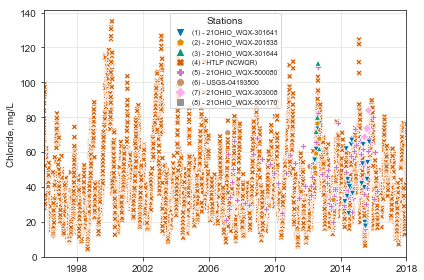

In [123]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, style='MonitoringLocationIdentifier')
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [89]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(1).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &    count &  mean &   std &   min &   25\% &   50\% &   75\% &    max \\
MonitoringLocationIdentifier &          &       &       &       &       &       &       &        \\
\midrule
21OHIO\_WQX-301641            &     25.0 &  46.9 &  17.3 &  17.6 &  36.4 &  44.4 &  61.9 &   76.3 \\
21OHIO\_WQX-201838            &      5.0 &  57.4 &  16.7 &  32.7 &  51.1 &  59.2 &  67.7 &   76.4 \\
21OHIO\_WQX-301644            &      7.0 &  73.6 &  19.0 &  56.5 &  59.4 &  71.9 &  78.6 &  111.0 \\
HTLP (NCWQR)                 &  13725.0 &  41.5 &  19.2 &   4.1 &  27.7 &  37.6 &  52.0 &  135.0 \\
21OHIO\_WQX-500080            &     94.0 &  48.0 &  17.2 &  15.7 &  33.8 &  46.9 &  60.8 &  109.0 \\
USGS-04193500                &    350.0 &  38.8 &  18.5 &   5.7 &  26.1 &  35.6 &  48.9 &  105.0 \\
21OHIO\_WQX-303008            &      6.0 &  67.9 &  11.7 &  54.1 &  57.8 &  70.7 &  73.4 &   83.9 \\
21OHIO\_WQX-500170            &      1.0 &  39.1 &   NaN &  39.1 &  39.1 

In [90]:
selected_stations

['21OHIO_WQX-301641',
 '21OHIO_WQX-201838',
 '21OHIO_WQX-301644',
 'HTLP (NCWQR)',
 '21OHIO_WQX-500080',
 'USGS-04193500',
 '21OHIO_WQX-303008',
 '21OHIO_WQX-500170']

In [91]:
master_stations = [st[0] for st in Show_IDS if st[1]]
master_stations = ['HTLP (NCWQR)']
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(13725, 67)

In [92]:
master_st_df.groupby('ActivityStartDate').mean().shape

(13725, 8)

In [105]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']][master_st_df.ActivityStartDate>datetime.datetime(1995,12,31)].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [94]:
# Finde station here:
# https://www.hydrocloud.org
site = '04193500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [95]:
discharge.columns

Index(['USGS:04193500:00060:00003', 'USGS:04193500:00060:00003_qualifiers'], dtype='object')

In [96]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [97]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [98]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [99]:
# discharge = discharge.append(df_Q_heideleberg)

In [100]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [101]:
river

'Maumee_R'

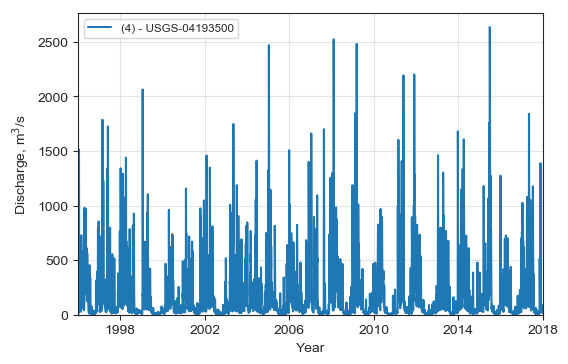

In [102]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(4) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [103]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [106]:
river

'Maumee_R'

In [107]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [108]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


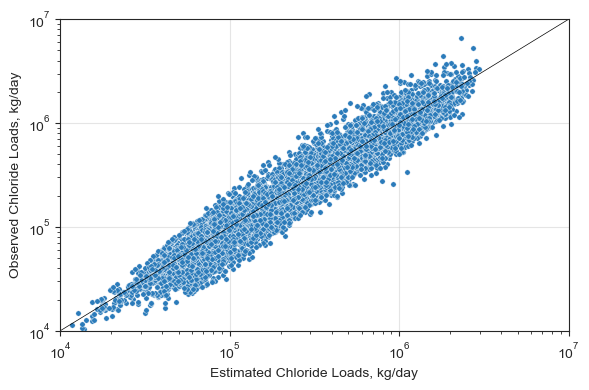

In [112]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e4, 1e7
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [116]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [117]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.5,199.685337,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,4.420665,203.681702,212.366416,3.442792,0.328818,36.243976,420576.476931,35.100995,419895.178905,153510.414080,52763.674418
1,1997,457.0,218.329557,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,4.658677,217.912685,213.039901,3.437615,0.334568,35.193449,476316.676716,39.734979,404842.468695,173855.587001,61256.639794
2,1998,822.0,207.071633,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,4.612811,207.557663,212.154535,3.464394,0.337025,35.696831,473044.086746,40.823349,411455.462858,172661.091662,60592.871324
3,1999,1187.0,129.357949,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,3.663842,129.431295,129.939434,3.761716,0.337308,50.362273,317311.128235,41.813031,417194.547869,115818.561806,40045.272795
4,2000,1552.5,105.978428,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,3.845563,105.496401,103.410523,3.753815,0.339401,50.938563,273024.836931,42.669313,422626.761474,99654.065480,35694.093472
5,2001,1918.0,119.536890,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,4.031018,119.823417,121.097824,3.697878,0.343283,45.352139,330319.861937,43.543995,426109.519527,120566.749607,42809.269335
6,2002,2283.0,188.864816,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,4.258640,188.984888,189.654831,3.650930,0.334286,43.623350,456158.659119,44.265755,430531.794731,166497.910579,58416.736573
7,2003,2648.0,182.750487,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,4.216918,178.939882,175.288687,3.683232,0.324465,47.027625,402226.117961,44.245711,433626.099990,146812.533056,49907.164430
8,2004,3013.5,171.982289,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,4.560774,175.780062,178.496886,3.583722,0.317395,39.874205,436353.833575,43.343657,430082.733968,159269.149255,53319.142111
9,2005,3379.0,185.706068,56703.0,6.526027,183.838356,2005.248146,1863.501370,3379.0,4.213238,183.911877,183.360427,3.634660,0.311583,41.652339,438766.793671,42.288634,419870.523484,160149.879690,50716.039551


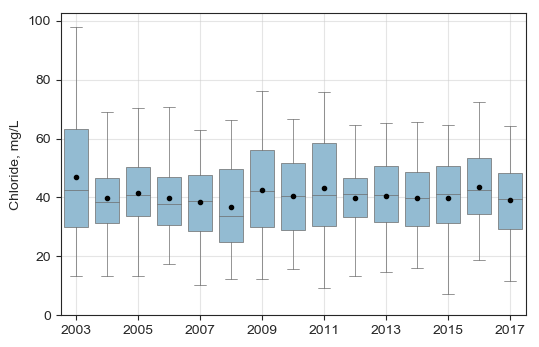

In [118]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [119]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1996,137.5,199.685337,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,4.420665,203.681702,212.366416,3.442792,0.328818,36.243976,420576.476931,35.100995,419895.178905,153510.414080,52763.674418
1997,457.0,218.329557,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,4.658677,217.912685,213.039901,3.437615,0.334568,35.193449,476316.676716,39.734979,404842.468695,173855.587001,61256.639794
1998,822.0,207.071633,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,4.612811,207.557663,212.154535,3.464394,0.337025,35.696831,473044.086746,40.823349,411455.462858,172661.091662,60592.871324
1999,1187.0,129.357949,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,3.663842,129.431295,129.939434,3.761716,0.337308,50.362273,317311.128235,41.813031,417194.547869,115818.561806,40045.272795
2000,1552.5,105.978428,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,3.845563,105.496401,103.410523,3.753815,0.339401,50.938563,273024.836931,42.669313,422626.761474,99654.065480,35694.093472
2001,1918.0,119.536890,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,4.031018,119.823417,121.097824,3.697878,0.343283,45.352139,330319.861937,43.543995,426109.519527,120566.749607,42809.269335
2002,2283.0,188.864816,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,4.258640,188.984888,189.654831,3.650930,0.334286,43.623350,456158.659119,44.265755,430531.794731,166497.910579,58416.736573
2003,2648.0,182.750487,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,4.216918,178.939882,175.288687,3.683232,0.324465,47.027625,402226.117961,44.245711,433626.099990,146812.533056,49907.164430
2004,3013.5,171.982289,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,4.560774,175.780062,178.496886,3.583722,0.317395,39.874205,436353.833575,43.343657,430082.733968,159269.149255,53319.142111


In [120]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




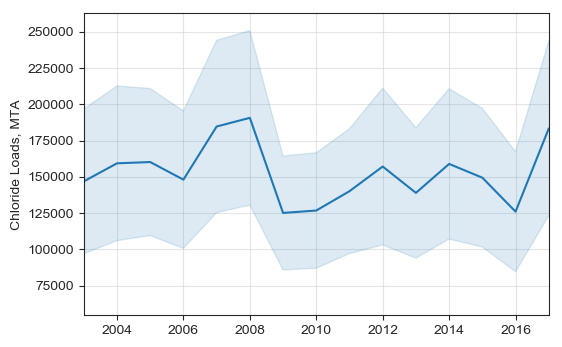

In [121]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [122]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
       7  &        8  &        9  &        10 &        11 &        12 &        13 &        14 &        15 &        16 &        17 &        18 &        19 &        20 &        21 \\
\midrule
   2003.0 &    2004.0 &    2005.0 &    2006.0 &    2007.0 &    2008.0 &    2009.0 &    2010.0 &    2011.0 &    2012.0 &    2013.0 &    2014.0 &    2015.0 &    2016.0 &    2017.0 \\
 146812.5 &  159269.1 &  160149.9 &  148003.5 &  184639.3 &  190618.3 &  125063.1 &  126722.3 &  140049.5 &  157055.5 &  138892.3 &  158851.5 &  149365.6 &  125938.5 &  183310.9 \\
  49907.2 &   53319.1 &   50716.0 &   47387.6 &   59428.7 &   60170.3 &   39253.1 &   39823.3 &   43018.2 &   54065.5 &   44948.2 &   51821.4 &   47781.7 &   41397.8 &   60138.3 \\
\bottomrule
\end{tabular}

